<a href="https://colab.research.google.com/github/krishnamhn009/datascience/blob/master/Server_Read_Write_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing library

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read the data using pd.read_csv and writing parse_date=True, makes sure that pandas understands that it is dealing with date values and not string values

In [2]:
urlMonthly='/content/sample_data/Server_Disk_Monthly.csv'
urlDaily='/content/sample_data/Server-Read-Write-Response-Daily1.csv'
df = pd.read_csv(urlDaily,encoding = "ISO-8859-1",parse_dates=True)
df.head()

,ï»¿SampleDate,YearOfSample,MonthOfSample,DayOfSample,QuarterOfSample,SqlInstanceName,DatabaseName,CalcNumOfReads,CalcNumOfWrites,CalcNumOfBytesReadPerDay,CalcNumOfBytesWrittenPerDay,CalcNumOfTeraBytesReadPerDay,CalcNumOfTeraBytesWrittenPerDay,CalcSizeOnDiskBytes
0,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,GCM_FS_Work,326269,22,3.280000e+11,1.802240e+05,0.30,0.00,3.270000e+11
1,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,IFRS9_GCM_Freeze,13684,22,1.205531e+10,1.802240e+05,0.01,0.00,1.288490e+10
2,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,CreditCore_GCM_Work,1202715,194460,1.050000e+12,1.310000e+11,0.96,0.12,7.770000e+11
3,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,DBA,27362,-5668,7.080018e+08,-1.187881e+09,0.00,0.00,0.000000e+00
4,21-07-2020 00:00,2020,7,21,Q3,WSPE001618\DEINSTANCE00,IFRS9_GCM_QA,2910,22,1.491812e+09,1.802240e+05,0.00,0.00,7.516193e+09


# Reading Data

In [3]:
df.columns

Index(['ï»¿SampleDate', 'YearOfSample', 'MonthOfSample', 'DayOfSample',
       'QuarterOfSample', 'SqlInstanceName', 'DatabaseName', 'CalcNumOfReads',
       'CalcNumOfWrites', 'CalcNumOfBytesReadPerDay',
       'CalcNumOfBytesWrittenPerDay', 'CalcNumOfTeraBytesReadPerDay',
       'CalcNumOfTeraBytesWrittenPerDay', 'CalcSizeOnDiskBytes'],
      dtype='object')

Here data contains various columns ,but I have to check read and write data .which is important here

Below creating one new column SampleDate whihc will have sample date values.

In [4]:
import datetime
df['SampleDate']=df['ï»¿SampleDate']
df['SampleDate']

0        21-07-2020 00:00
1        21-07-2020 00:00
2        21-07-2020 00:00
3        21-07-2020 00:00
4        21-07-2020 00:00
               ...       
80043    12-02-2022 00:00
80044    12-02-2022 00:00
80045    12-02-2022 00:00
80046    12-02-2022 00:00
80047    12-02-2022 00:00
Name: SampleDate, Length: 80048, dtype: object

# Data extracting functions

In [5]:
#function to set index in dataframe for given column
def setIndex(columnName,dataframe):
  dataframe.set_index(columnName, inplace = True)
  dataframe=dataframe.asfreq('D')
  dataframe.index.freq='D'

#func to get data for specific database
def getDataSet(databaseName):
  print("input param ",databaseName)
  dfAnalysis=df[(df.DatabaseName == databaseName)]
  setIndex('SampleDate',dfAnalysis)
  return dfAnalysis

# data clean
def cleanDataSet(dfAnalysis):
  dfAnalysis=dfAnalysis.dropna()
  dfAnalysis.round(2) 
  return dfAnalysis

In [6]:
dfAnalysis=getDataSet('IFRS9_SME_Retail_PRD')
dfAnalysis=cleanDataSet(dfAnalysis)
dfAnalysis

input param  IFRS9_SME_Retail_PRD


,ï»¿SampleDate,YearOfSample,MonthOfSample,DayOfSample,QuarterOfSample,SqlInstanceName,DatabaseName,CalcNumOfReads,CalcNumOfWrites,CalcNumOfBytesReadPerDay,CalcNumOfBytesWrittenPerDay,CalcNumOfTeraBytesReadPerDay,CalcNumOfTeraBytesWrittenPerDay,CalcSizeOnDiskBytes
SampleDate,,,,,,,,,,,,,,
21-07-2020 00:00,21-07-2020 00:00,2020,7,21,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,187423,0,2.430153e+10,0.0,0.02,0.0,1.510428e+10
22-07-2020 00:00,22-07-2020 00:00,2020,7,22,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,83,0,5.275648e+06,0.0,0.02,0.0,0.000000e+00
23-07-2020 00:00,23-07-2020 00:00,2020,7,23,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,5,0,3.194880e+05,0.0,0.02,0.0,0.000000e+00
24-07-2020 00:00,24-07-2020 00:00,2020,7,24,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,149,0,9.134080e+06,0.0,0.02,0.0,0.000000e+00
25-07-2020 00:00,25-07-2020 00:00,2020,7,25,Q3,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,223,0,1.458995e+07,0.0,0.02,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-02-2022 00:00,08-02-2022 00:00,2022,2,8,Q1,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,643,0,3.003187e+07,0.0,0.00,0.0,0.000000e+00
09-02-2022 00:00,09-02-2022 00:00,2022,2,9,Q1,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,35,0,1.908736e+06,0.0,0.00,0.0,0.000000e+00
10-02-2022 00:00,10-02-2022 00:00,2022,2,10,Q1,WSPE000899\DEINSTANCE00,IFRS9_SME_Retail_PRD,693,0,9.609216e+06,0.0,0.00,0.0,0.000000e+00


# Extracting required columns 

In [7]:
dfCurrentSizeOnDisk=dfAnalysis[['CalcNumOfBytesReadPerDay']]# CurrentSizeOnDiskTeraBytes ,CurrentSizeOnDiskBytes
dfCurrentSizeOnDisk

,CalcNumOfBytesReadPerDay
SampleDate,
21-07-2020 00:00,2.430153e+10
22-07-2020 00:00,5.275648e+06
23-07-2020 00:00,3.194880e+05
24-07-2020 00:00,9.134080e+06
25-07-2020 00:00,1.458995e+07
...,...
08-02-2022 00:00,3.003187e+07
09-02-2022 00:00,1.908736e+06
10-02-2022 00:00,9.609216e+06


# Plot  data

In [8]:
dfCurrentSizeOnDisk.describe()
dfCurrentSizeOnDisk['CalcNumOfBytesReadPerDay']

SampleDate
21-07-2020 00:00    2.430153e+10
22-07-2020 00:00    5.275648e+06
23-07-2020 00:00    3.194880e+05
24-07-2020 00:00    9.134080e+06
25-07-2020 00:00    1.458995e+07
                        ...     
08-02-2022 00:00    3.003187e+07
09-02-2022 00:00    1.908736e+06
10-02-2022 00:00    9.609216e+06
11-02-2022 00:00    1.589248e+07
12-02-2022 00:00    2.327347e+07
Name: CalcNumOfBytesReadPerDay, Length: 558, dtype: float64

This gives an idea of whether the data is stationary or not.
Any time series data that has to be modeled needs to be stationary. Stationary means that it’s statistical properties are more or less constant with time.These are the following properties that any stationarity model will have:
<br>
*   Constant Mean
*   Constant Variance(There can be variations, but the variations shouldn’t be irregular)
*   No seasonality(No repeating patterns in the data set)
<br>

So first step is to check for stationarity. If data set is not stationary, I'll have to convert it to a stationary series.I have a fixed easy test to check for stationarity called the ADF(Augmented Dickey Fuller Test). But before showing that, lets plot the data first.
Since I am only interested in predicting the **CalcNumOfBytesReadPerDay**, that is the only column I will be plotting.

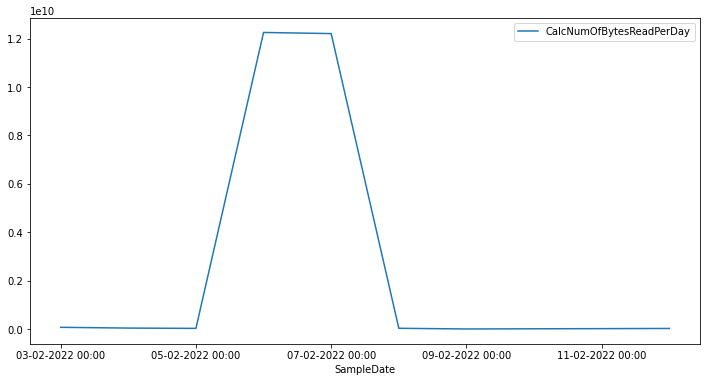

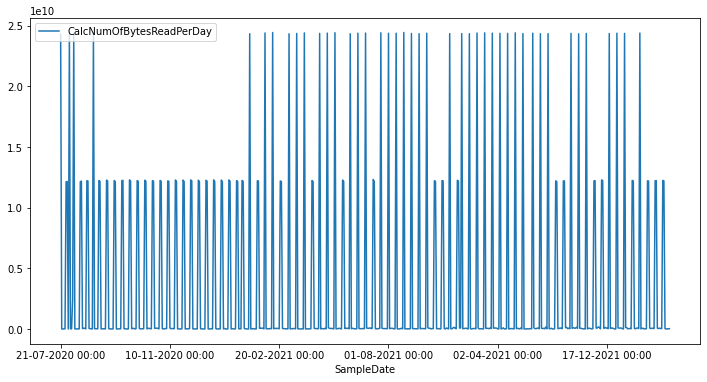

In [9]:
dfCurrentSizeOnDisk.tail(10).plot(figsize=(12,6))
dfCurrentSizeOnDisk.plot(figsize=(12,6))

# Checking For Stationarity
we can see that it seems to have somewhat of a constant mean around 45. And the fluctuations also seem to be more or less the same. However to be sure if the data is stationary or not,running a fixed statistical test using the following code:

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [11]:
adf_test(dfCurrentSizeOnDisk['CalcNumOfBytesReadPerDay'])

1. ADF :  -10.174676990829022
2. P-Value :  6.942459602725276e-18
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 545
5. Critical Values :
	 1% :  -3.442405720052601
	 5% :  -2.866857804790472
	 10% :  -2.5696022094099824


To interpret the test results,only need to look at the p value:
If p< 0.05 ; Data is stationary
if p>0.05; Data is not stationary.

---
Here  P-Value :  0.0 then data is stationary

It’s not a hard and fast rule, but a stationary data should have a small p value. Larger p value could indicate presence of certain trends(varying mean) or seasonality as well.


# ARIMA Model

**ARIMA** is composed of 3 terms(Auto-Regression + Integrated+Moving-Average)

**Auto-Regression:**
This basically means that using  previous values of the time series in order to predict the future. How many past values you use,it depends.. determine the order of the AR model. Here’s how an AR(1) model looks like:
`Y(t)= Some_Constant*Y(t-1)+ Another_Constant +Error(t)`


**Integrated**:
If data set is not stationary, It often need to perform some sort of difference operation to make it stationary. If differencing with previous value, its order 1 and so on. Here’s an example of that:

 we can the series Y(t) was not stationary, because of an increasing trend resulting in a varying mean. I simply subtract it from previous values and voila! It becomes stationary. Depending on data,might have to repeat the differencing to get a second order differencing , third order and so on..

**Moving Average:**
This basically means that I am using previous errors to make the future prediction.By seeing how wrong in your prediction,can be used to make a better prediction. And just like in an AR model, the number of previous errors(also called number of lags), determines the order of the model.
Here’s how MA(1) order equation looks like:
`Y(t)= Mean + Some_Constant*Error(t-1) +Error(t)`
So main job is to decide the order of the AR, I, MA parts which are donated by(p,d,q) respectively.

**pmdarima** library comes to our rescue! It does the job of figuring out the order of the ARIMA all by itself.

In [12]:
!pip install pmdarima

In [13]:

!pip install numpy scipy patsy pandas statsmodels

In [14]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [15]:
stepwise_fit = auto_arima(dfCurrentSizeOnDisk['CalcNumOfBytesReadPerDay'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27216.384, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27294.244, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27191.839, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26933.505, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27292.255, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26933.544, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26917.818, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26905.869, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26817.553, Time=0.79 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=26840.676, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26848.381, Time=2.03 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=26829.362, Time=0.75 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=26853.653, Time=0.71 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26787.067, Time=2.64 sec
 ARIMA(3,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  558
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -13373.237
Date:                Thu, 17 Feb 2022   AIC                          26760.475
Time:                        12:22:09   BIC                          26790.733
Sample:                             0   HQIC                         26772.293
                                - 558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4336      0.165     -2.626      0.009      -0.757      -0.110
ar.L2         -0.4082      0.140     -2.916      0.004      -0.682      -0.134
ma.L1         -0.9131      0.114     -8.020      0.000      -1.136      -0.690
ma.L2         -0.2325      0.192     -1.210      0.226      -0.609       0.144
ma.L3         -0.5212      0.115     -4.527      0.000      -0.747      -0.296
ma.L4          0.7071      0.060     11.795      0.000       0.590       0.825
sigma2      6.502e+19   3.02e-21   2.15e+40      0.000     6.5e+19     6.5e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                78.29
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.82
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.67e+55. Standard errors may be unstable.
"""

We can see the best ARIMA model seems to be of the order (2,1,4) with the minimum AIC score=26760.381. With this knowledge we can finally proceed to train and fit the model to start making prediction!

# Split Dataset
Before actually train the model, I am spliting the data set into a training and testing section.first train the model on the data and keep the testing section hidden from the model. Once model is ready, I can ask it to make predictions on the test data and see how well it performs.

In [16]:
print(dfCurrentSizeOnDisk.shape)
train=dfCurrentSizeOnDisk.iloc[:-30]
test=dfCurrentSizeOnDisk.iloc[-30:]
print(train.shape,test.shape)

(558, 1)
(528, 1) (30, 1)


In [17]:
print(train['CalcNumOfBytesReadPerDay'])
print(test['CalcNumOfBytesReadPerDay'])

SampleDate
21-07-2020 00:00    2.430153e+10
22-07-2020 00:00    5.275648e+06
23-07-2020 00:00    3.194880e+05
24-07-2020 00:00    9.134080e+06
25-07-2020 00:00    1.458995e+07
                        ...     
09-01-2022 00:00    1.225196e+10
10-01-2022 00:00    1.220361e+10
11-01-2022 00:00    4.771840e+07
12-01-2022 00:00    1.543373e+07
13-01-2022 00:00    6.810010e+07
Name: CalcNumOfBytesReadPerDay, Length: 528, dtype: float64
SampleDate
14-01-2022 00:00    8.178074e+07
15-01-2022 00:00    2.768896e+07
16-01-2022 00:00    2.439662e+10
17-01-2022 00:00    8.601600e+06
18-01-2022 00:00    4.779213e+07
19-01-2022 00:00    5.873664e+07
20-01-2022 00:00    3.366912e+06
21-01-2022 00:00    1.710490e+07
22-01-2022 00:00    2.431386e+07
23-01-2022 00:00    1.221745e+10
24-01-2022 00:00    1.219303e+10
25-01-2022 00:00    7.818445e+07
26-01-2022 00:00    3.378381e+07
27-01-2022 00:00    6.078464e+07
28-01-2022 00:00    5.029888e+07
29-01-2022 00:00    2.609152e+07
30-01-2022 00:00    1.22271

In [18]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.arima.model as stats
model=stats.ARIMA(train['CalcNumOfBytesReadPerDay'],order=(2,1,4))
model=model.fit()
model.summary()
# steps = 4
# alpha = 0.05
# model = stats.ARIMA(train['CalcNumOfBytesReadPerDay'], order=(0, 1, 0), trend="t")
# model = model.fit()
# print(model.summary())
# forecast = model.get_forecast(steps=steps)
# forecasts_and_intervals = forecast.summary_frame(alpha=alpha)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     CalcNumOfBytesReadPerDay   No. Observations:                  528
Model:                       ARIMA(2, 1, 4)   Log Likelihood              -12657.481
Date:                      Thu, 17 Feb 2022   AIC                          25328.962
Time:                              12:22:10   BIC                          25358.832
Sample:                                   0   HQIC                         25340.656
                                      - 528                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4510      0.166     -2.716      0.007      -0.776      -0.125
ar.L2         -0.4150      0.143     -2.899      0.004      -0.696      -0.134
ma.L1         -0.8973      0.111     -8.073      0.000      -1.115      -0.679
ma.L2         -0.2407      0.186     -1.297      0.195      -0.604       0.123
ma.L3         -0.5411      0.115     -4.713      0.000      -0.766      -0.316
ma.L4          0.7207      0.060     12.109      0.000       0.604       0.837
sigma2      6.657e+19   2.78e-21   2.39e+40      0.000    6.66e+19    6.66e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                71.11
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                             0.80
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.68e+55. Standard errors may be unstable.
"""

# Check Model

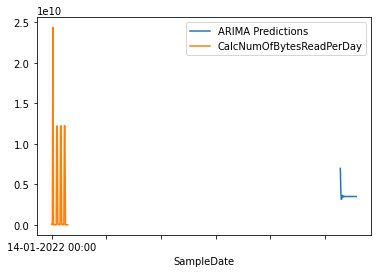

In [19]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['CalcNumOfBytesReadPerDay'].plot(legend=True)

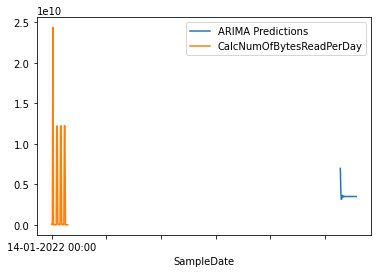

In [20]:
pred.plot(legend='ARIMA Predictions')
test['CalcNumOfBytesReadPerDay'].plot(legend=True)

# Check Accuracy Metric

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['CalcNumOfBytesReadPerDay'].mean()
rmse=sqrt(mean_squared_error(pred,test['CalcNumOfBytesReadPerDay']))
print(rmse)

6386061017.263107


In [22]:
model2=stats.ARIMA(dfCurrentSizeOnDisk['CalcNumOfBytesReadPerDay'],order=(2,1,4))
model2=model2.fit()
dfCurrentSizeOnDisk.tail()

,CalcNumOfBytesReadPerDay
SampleDate,
08-02-2022 00:00,30031872.0
09-02-2022 00:00,1908736.0
10-02-2022 00:00,9609216.0
11-02-2022 00:00,15892480.0
12-02-2022 00:00,23273472.0


# For Future Dates

In [23]:
index_future_dates=pd.date_range(start='2022-02-08',end='2022-02-17')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+9,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-02-08    3.341675e+09
2022-02-09    3.341675e+09
2022-02-10    3.341675e+09
2022-02-11    3.341675e+09
2022-02-12    3.341675e+09
2022-02-13    3.341675e+09
2022-02-14    3.341675e+09
2022-02-15    3.341675e+09
2022-02-16    3.341675e+09
2022-02-17    3.341675e+09
Freq: D, Name: ARIMA Predictions, dtype: float64


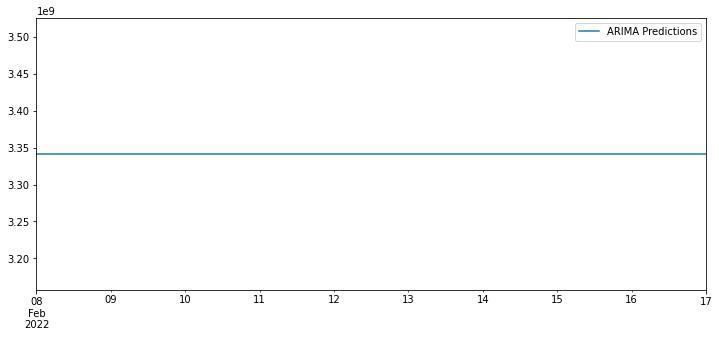

In [24]:
pred.plot(figsize=(12,5),legend=True)